In [3]:
# Data Type : Microarray data
# Dependent Variable : 0 or 1
# Human Acute Myeloid Leukemia (AML) or Acute Lymphoblast Leukemia (ALL))
library(spikeslab)
data(leukemia)

In [5]:
library(glmnet)

In [6]:
x <- as.matrix(leukemia[,-1])
y <- leukemia[,1]

# 행, 열
cat( nrow(leukemia), ncol(leukemia) )

72 3572

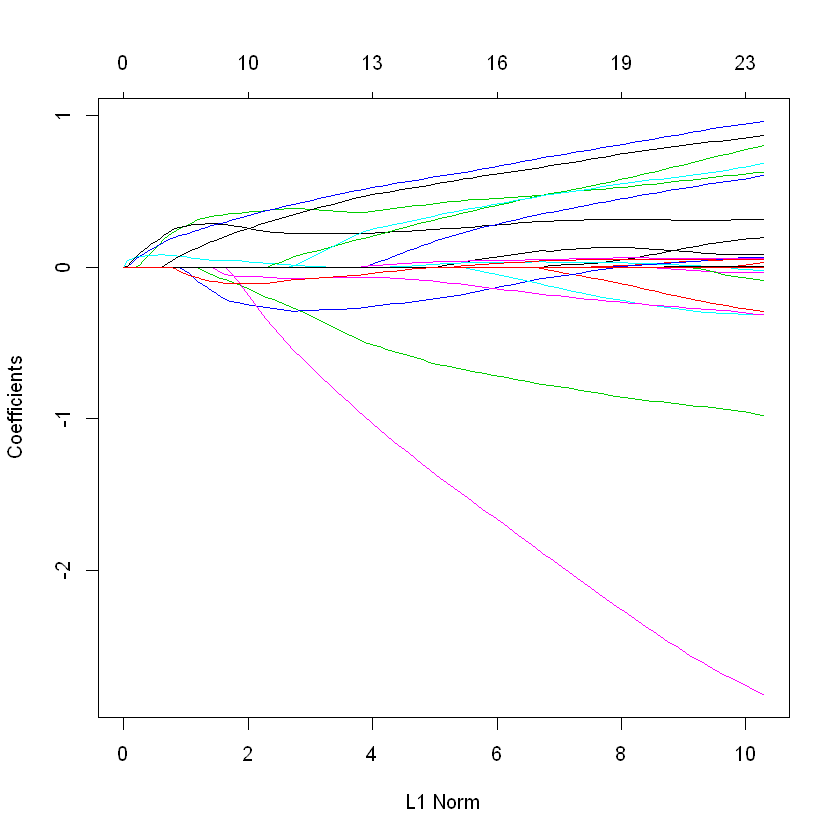

In [69]:
lasso.leukemia <- glmnet(x, y, family = "binomial")
plot(lasso.leukemia)
# 선택할 수 있는 최대 변수의 개수 = 샘플의 수

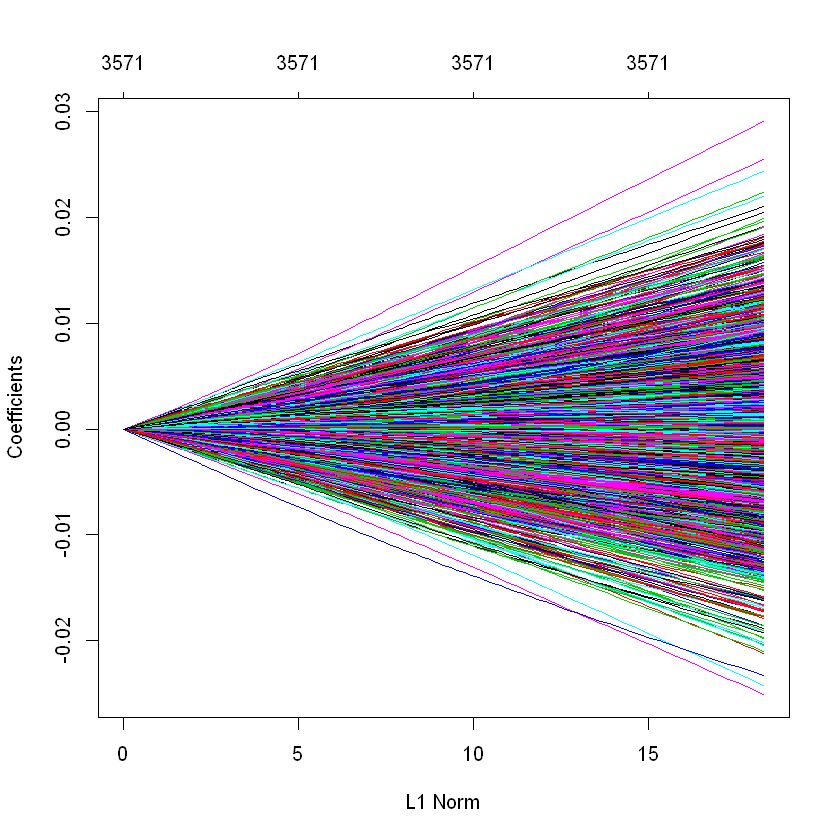

In [8]:
ridge.leukemia <- glmnet(x, y, family = "binomial", alpha = 0)
plot(ridge.leukemia)
# 모든 변수를 다 선택

In [74]:
############### Ridge
# Cross-validation 으로 모수 값 구하기. (turning parameter : lambda)

currentTs <- Sys.time()
# about five seconds later

lambda.vec.ridge <- rep(0, 200)

for (i in 1 : 200)
{
    set.seed(i)

    cv.ridge.leukemia <- cv.glmnet(x, y, nfolds = 5, alpha = 0, family = "binomial")
    index.min.ridge <- which.min(cv.ridge.leukemia$cvm)
    lambda.vec.ridge[i] <- cv.ridge.leukemia$lambda[index.min.ridge]
}

elapsed <- Sys.time() - currentTs
print(elapsed)

Time difference of 8.397904 mins


In [75]:
# Ridge 좋은 모수 값 구하기
opt.lambda.ridge <- mean(lambda.vec.ridge)

# 모든 샘플을 이용하여 Ridge 회귀 모형 적합하기
model.ridge <- glmnet(x, y, lambda = opt.lambda.ridge, alpha = 0, family = "binomial")

# 이분형 종속변수 (AML 과ALL) 를 설명 하는 중요한 gene 찾기
# 선택된 변수 (gene) 의 회귀 계수 보기
length(model.ridge$beta[which(model.ridge$beta != 0)])

# 적합된 종속변수의 값 (Fitted value of Fitted probability) 보기
X.beta.ridge <- predict(model.ridge, newx = x, s = opt.lambda.ridge)
fitted.y.ridge <- exp(X.beta.ridge) / (1 + exp(X.beta.ridge))

# 관찰된 종속 변수의 값이 0 또는 1 이므로 
# 적합된 값이 0.5 이상이면 1로, 0.5 미만이면 0으로 바꾼 후, 
# 관찰된 종속변수의 값과 적합된 종속 변수의 값을 비교
table(y - round (fitted.y.ridge))



[1] 3571


 0 
72 

In [76]:
############### LASSO
currentTs <- Sys.time()
# about five seconds later

lambda.vec.lasso <- rep(0, 200)

for (i in 1 : 200)
{
    set.seed(i)
    
    cv.lasso.leukemia <- cv.glmnet(x, y, nfolds = 5, family = "binomial")
    index.min.lasso <- which.min(cv.lasso.leukemia$cvm)
    lambda.vec.lasso[i] <- cv.lasso.leukemia$lambda[index.min.lasso]
}

elapsed <- Sys.time() - currentTs
print(elapsed)

Time difference of 42.50535 secs


In [77]:
# LASSO 좋은 모수 값 구하기
opt.lambda.lasso <- mean(lambda.vec.lasso)

# 모든 샘플을 이용하여 Ridge 회귀 모형 적합하기
model.lasso <- glmnet(x, y, lambda = opt.lambda.lasso, family = "binomial")

# 이분형 종속변수 (AML 과ALL) 를 설명 하는 중요한 gene 찾기
# 선택된 변수 (gene) 의 회귀 계수 보기
length(model.lasso$beta[which(model.lasso$beta != 0)])

# 적합된 종속변수의 값 (Fitted value of Fitted probability) 보기
X.beta.lasso <- predict(model.lasso, newx = x, s = opt.lambda.lasso)
fitted.y.lasso <- exp(X.beta.lasso) / (1 + exp(X.beta.lasso))

# 관찰된 종속 변수의 값이 0 또는 1 이므로 
# 적합된 값이 0.5 이상이면 1로, 0.5 미만이면 0으로 바꾼 후, 
# 관찰된 종속변수의 값과 적합된 종속 변수의 값을 비교
table(y - round (fitted.y.lasso))

[1] 22


 0 
72 

Time difference of 0.2936671 secs


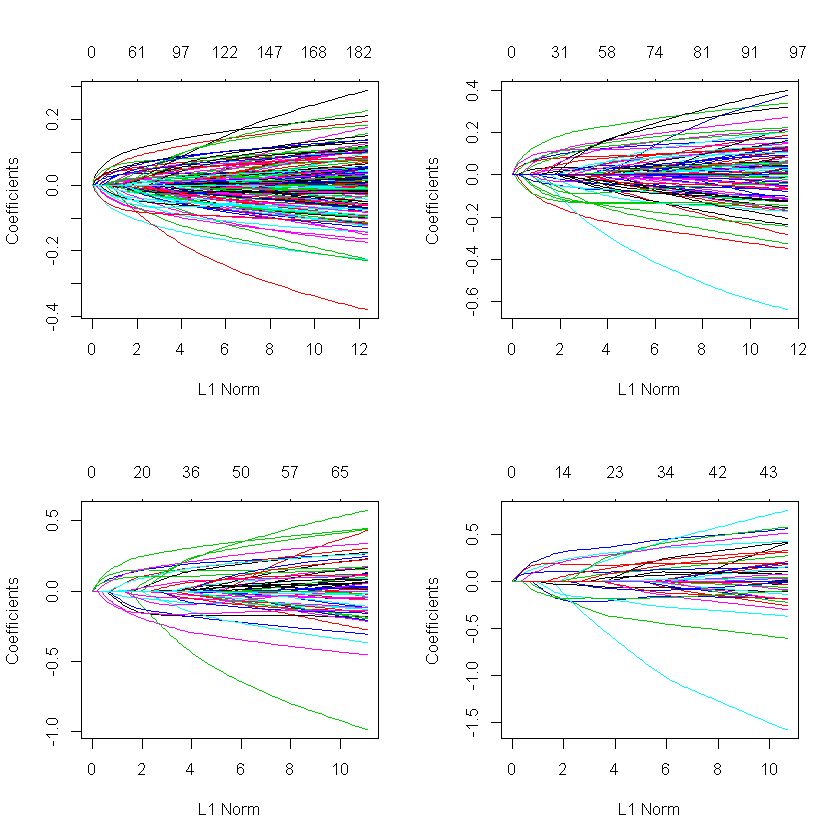

In [72]:
# Elastic Net
# p > n 인 경우, LASSO 는 n 개 이상 변수 선택 불가능
# 변수가 그룹화 되어 있을 경우, LASSO 는 무시함
# 변수간의 correlation 이 높은 경우 LASSO 의 solution path 가 불안정함.

elasticnet.leukemia.0.2 <- glmnet(x, y, family = "binomial", alpha = 0.2)
elasticnet.leukemia.0.4 <- glmnet(x, y, family = "binomial", alpha = 0.4)
elasticnet.leukemia.0.6 <- glmnet(x, y, family = "binomial", alpha = 0.6)
elasticnet.leukemia.0.8 <- glmnet(x, y, family = "binomial", alpha = 0.8)

layout(mat=matrix(c(1, 2,
                    3, 4), nrow=2, byrow = TRUE))

plot(elasticnet.leukemia.0.2)
plot(elasticnet.leukemia.0.4)
plot(elasticnet.leukemia.0.6)
plot(elasticnet.leukemia.0.8)

elapsed <- Sys.time() - currentTs
print(elapsed)

In [78]:
currentTs <- Sys.time()
# about five seconds later

lambda.enet.vec=rep(0,200)

for (i in 1:200)
{
    set.seed(i)
    cv.enet <- cv.glmnet(x, y, nfolds = 5, family = "binomial", alpha = 0.5)
    index.enet <- which.min(cv.enet$cvm)
    lambda.enet.vec[i] <- cv.enet$lambda[index.enet]
}

elapsed <- Sys.time() - currentTs
print(elapsed)

Time difference of 47.04814 secs


In [79]:
opt.lambda.enet <- mean(lambda.enet.vec)

model.enet <- glmnet(x,y,lambda = opt.lambda.enet,family = "binomial", alpha = 0.5)

# 이분형 종속변수 (AML 과ALL) 를 설명 하는 중요한 gene 찾기
# 선택된 변수 (gene) 의 회귀 계수 보기
length(model.enet$beta[which(model.enet$beta != 0)])

# 적합된 종속변수의 값 (Fitted value of Fitted probability) 보기
X.beta.enet <- predict(model.enet, newx = x, s = opt.lambda.enet)
fitted.y.enet <- exp(X.beta.enet) / (1 + exp(X.beta.enet))

# 관찰된 종속 변수의 값이 0 또는 1 이므로 
# 적합된 값이 0.5 이상이면 1로, 0.5 미만이면 0으로 바꾼 후, 
# 관찰된 종속변수의 값과 적합된 종속 변수의 값을 비교
table(y - round (fitted.y.enet))

[1] 76


 0 
72 